## 2.3 图像滤波
### 2.3.1 图像滤波简介

滤波实际上是信号处理得一个概念，图像可以看成一个二维信号，其中像素点的灰度值代表信号的强弱；

高低频滤波

- 高频：图像上变化剧烈的部分；
- 低频：图像灰度值变化缓慢，平坦的地方；
- 根据图像高低频，设置高通和低通滤波器。高通滤波器可以检测变化尖锐，明显的地方，低通可以让图像变得平滑，消除噪声；
- 滤波作用：高通滤波器用于<u>**边缘检测**</u>，低通滤波器用于图像<u>**平滑去噪**</u>；

滤波器种类

- 线性滤波：方框滤波/均值滤波/高斯滤波
- 非线性滤波：中值滤波/双边滤波；

领域算子：利用给定像素周围的像素值，决定此像素的最终输出值的一种算子；

线性滤波：一种常用的领域算子，像素输出取决于输入像素的加权和：
$$
g(i,j)=\sum\limits_{k,l}f(i+k,j+l)h(k,l)
$$
$h(k,l)$ 是 kernel，也就是 CNN 里面的卷积算子

### 2.3.2 线性滤波
#### a. 方框滤波

方框滤波（ box Filter）被封装在一个名为 `boxFilter` 的函数中，即 `boxFilter` 函数的作用是使用方框滤波器（ box filter）来模糊一张图片，从 `src` 输入，从 `dst` 输出；

方框滤波核：

$$
\begin{align}
{\rm{K}} &= \alpha \left[ {\begin{array}{*{20}{c}}
1&1& \cdots &1\\
1&1& \cdots &1\\
 \cdots & \cdots & \cdots & \cdots \\
1&1& \cdots &1
\end{array}} \right]\\

\alpha&=
\left\{ {\begin{array}{*{20}{cr}}
{\frac{1}{{{\rm{width}} \times {\rm{height}}}}}&{\quad {\rm{normalize}} = {\rm{true}}}\\
1&{{\rm{normalize}} = {\rm{false}}}
\end{array}} \right.
\end{align}
$$

- `normalize = true` 与均值滤波相同（归一化）
- `normalize = false` 很容易发生溢出（图片像素变白）

函数：`cv2.boxFilter(src, depth, ksize, normalize)`

参数说明

- 参数1：输入图像
- 参数2：目标图像深度
- 参数3：核大小
- 参数4：normalize 属性

In [1]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('images2/girl2.png', cv2.IMREAD_UNCHANGED)
r = cv2.boxFilter(img, -1, (7, 7), normalize=1)
d = cv2.boxFilter(img, -1, (3, 3), normalize=0)

plt.figure(figsize=(8, 8))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(r, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(d, cv2.COLOR_BGR2RGB))
plt.show()

ImportError: dlopen(/Users/plum/opt/anaconda3/envs/COMP9517/lib/python3.9/site-packages/cv2/cv2.cpython-39-darwin.so, 0x0002): Library not loaded: @rpath/libopencv_hdf.405.dylib
  Referenced from: <0988DEBC-6ED6-3C98-A741-1691317B9CB0> /Users/plum/opt/anaconda3/envs/COMP9517/lib/python3.9/site-packages/cv2/cv2.cpython-39-darwin.so
  Reason: tried: '/private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_5849a8_3a5/croots/recipe/opencv-suite_1659973599903/work/build/lib/libopencv_hdf.405.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_5849a8_3a5/croots/recipe/opencv-suite_1659973599903/work/build/lib/libopencv_hdf.405.dylib' (no such file), '/Users/plum/opt/anaconda3/envs/COMP9517/lib/python3.9/site-packages/cv2/../../../../libopencv_hdf.405.dylib' (no such file), '/private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_5849a8_3a5/croots/recipe/opencv-suite_1659973599903/work/build/lib/libopencv_hdf.405.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_5849a8_3a5/croots/recipe/opencv-suite_1659973599903/work/build/lib/libopencv_hdf.405.dylib' (no such file), '/Users/plum/opt/anaconda3/envs/COMP9517/lib/python3.9/site-packages/cv2/../../../../libopencv_hdf.405.dylib' (no such file), '/Users/plum/opt/anaconda3/envs/COMP9517/bin/../lib/libopencv_hdf.405.dylib' (no such file), '/Users/plum/opt/anaconda3/envs/COMP9517/bin/../lib/libopencv_hdf.405.dylib' (no such file), '/usr/local/lib/libopencv_hdf.405.dylib' (no such file), '/usr/lib/libopencv_hdf.405.dylib' (no such file, not in dyld cache)

#### b. 均值滤波

neighborhood average

均值滤波是一种最简单的滤波处理，它取的是卷积核区域内元素的均值，用 `cv2.blur()` 实现，如 $3\times3$ 的卷积核：
$$
{\rm{kernel}} = \frac{1}{9}\left[ {\begin{array}{*{20}{c}}
1&1&1\\
1&1&1\\
1&1&1
\end{array}} \right]
$$
smoothing in x and y

函数：`cv2.blur(src, ksize)`

参数说明

- 参数1：输入原图
- 参数2： kernel 的大小，一般为奇数

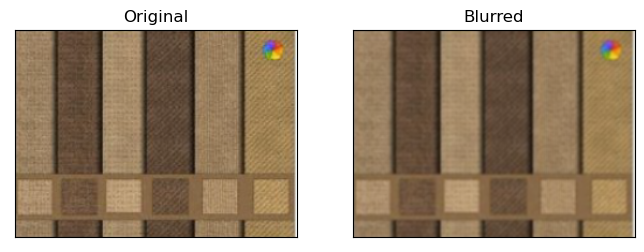

In [5]:
import cv2
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 8))
img = cv2.imread('images2/bilateral.png')
blur = cv2.blur(img, ksize=(3, 3))
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)), plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

图像卷积，图像滤波

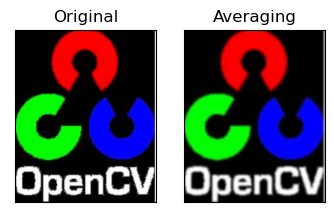

In [4]:
# kernel size = (5,5)
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

plt.figure(figsize=(4, 4))

img = cv.imread('./images2/opencv.png')
kernel = np.ones((5, 5), np.float32) / 25
dst = cv.filter2D(img, -1, kernel)
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(dst), plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

均值滤波（Mean Filtering）是一种简单的图像处理技术，它使用一个卷积核（也称为滤波器或窗口）来遍历图像的每一个像素。对于每一个像素，滤波器中的所有值通常都被设置为1，然后与其覆盖的像素值相乘后求和，并除以滤波器中的总数，从而得到一个新的像素值。这个操作的结果是对图像进行平滑处理，以减少噪声。

不同大小的卷积核在均值滤波中会有以下不同效果：

1. **大小**：卷积核的大小通常是奇数，如3x3、5x5、7x7等，这样可以确保卷积核有一个中心像素。

2. **平滑效果**：
   - **较小的卷积核**（例如3x3）：会产生轻微的平滑效果，仅仅能去除小的噪声或轻微的纹理。
   - **较大的卷积核**（例如7x7或更大）：会产生更强烈的平滑效果，可以去除更多的噪声，但可能导致图像失去一些细节信息。

3. **边缘模糊**：均值滤波会使图像的边缘变得模糊。使用较大的卷积核会加强这种模糊效果，因为更多的像素被用来计算每个输出像素的均值。

4. **计算复杂度**：较大的卷积核需要更多的计算。因此，使用大的卷积核会增加滤波操作的计算时间。

5. **局部性**：较小的卷积核更加局部，它仅考虑一个像素周围的小邻域。而较大的卷积核考虑了一个更广泛的区域，这意味着图像中的较大结构可能会被平滑掉。

总的来说，选择哪种大小的卷积核取决于具体的应用需求：如果你想去除细小的噪声并保留图像的大部分细节，可以选择较小的卷积核；如果你想去除更多的噪声并不太关心图像的细节，可以选择较大的卷积核。



#### c. 高斯滤波

高斯滤波是一种线性平滑滤波，适用于消除高斯噪声，广泛应用于图像处理的减噪过程。高斯滤波的卷积核权重并不相同，中间像素点权重最高，越远离中心的像素权重越小。其原理是一个 2 维高斯函数）
$$
{\rm{kernel}} = \frac{1}{16}\left[ {\begin{array}{*{20}{c}}
1&2&1\\
2&4&2\\
1&2&1
\end{array}} \right]
$$

<center class="half">
    <img src="./assets/normal_curve.png"/>
    <img src="./assets/normal_curve_3d.png"/>
</center>



高斯滤波相比均值滤波效率要慢，但可以有效消除高斯噪声，能保留更多的图像细节，所以经常被称为最有用的滤波器。

- 它是唯一可分离且圆对称的滤波器
- 在空间和频域具有最佳联合定位
- 高斯的傅里叶变换也是高斯函数
- 任何低通滤波器的 $n$ 倍卷积都收敛到高斯
- 它是无限平滑的，因此可以微分到任何所需的程度
- 它自然缩放（sigma）并允许一致的尺度空间理论
- 如果必须保留小对象，则最好使用高斯滤波


函数：`cv2.Guassianblur(src, ksize, std)`

参数说明

- 参数1：输入原图
- 参数2：高斯核大小
- 参数3：标准差 $\sigma$，平滑时，调整 $\sigma$ 实际是在调整周围像素对当前像素的影响程度，调大 $\sigma$ 即提高了远处像素对中心像素的影响程度，滤波结果也就越平滑。

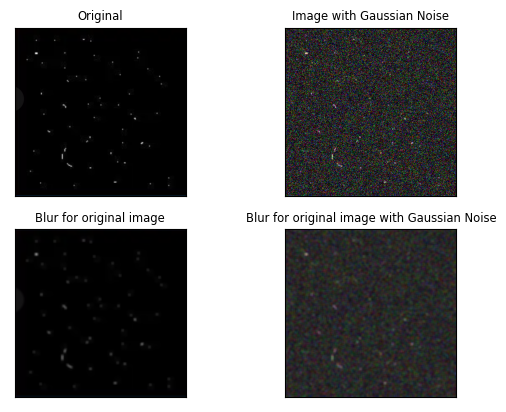

In [21]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('images2/median.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.subplot(221), plt.imshow(img), plt.title('Original', fontsize='small'), plt.xticks([]), plt.yticks([])

# add noise
mean = 0
sigma = 100
gaussian_noise = np.random.normal(mean, sigma, img.shape)
noisy_image = img + gaussian_noise
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)  # # 确保像素值在0到255之间
plt.subplot(222), plt.imshow(noisy_image, cmap='gray'), plt.title('Image with Gaussian Noise', fontsize='small'), plt.xticks([]), plt.yticks([])

blur = cv2.GaussianBlur(img, ksize=(7, 7), sigmaX=7)
plt.subplot(223), plt.imshow(blur), plt.title('Blur for original image', fontsize='small'), plt.xticks([]), plt.yticks([])

blur2 = cv2.GaussianBlur(noisy_image, ksize=(7, 7), sigmaX=7)
plt.subplot(224), plt.imshow(blur2), plt.title('Blur for original image with Gaussian Noise', fontsize='small'), plt.xticks([]), plt.yticks([])

plt.show()

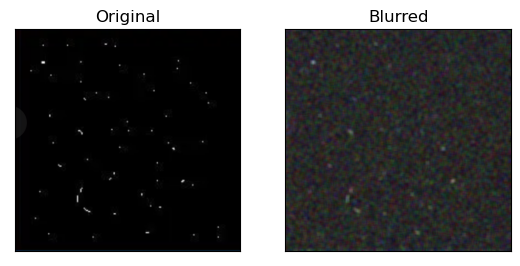

In [13]:
blur2 = cv2.GaussianBlur(noisy_image, (7, 7), 7)

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blur2), plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

### 2.3.3 非线性滤波

都会改变图像本身的性质，所以在医学图像中要慎用

#### a. 中值滤波

中值滤波是一种非线性滤波，是用像素点邻域灰度值的中指代替该点的灰度值，中值滤波可以去除椒盐噪声和斑点噪声。

- 强制具有不同强度的像素更像它们的邻居
- 它消除了孤立的强度尖峰（salt and pepper image noise）
- 邻域的大小通常为 $n\times n$ 像素，$n = 3, 5, 7$
- 这也消除了 pixel clusters（亮或暗）面积 $n^2/2$
- 如果必须删除小对象，中值过滤是最好的

函数：`cv2.medianBlur(img,ksize)`

参数说明:

- 参数1：输入原图
- 参数2：核大小

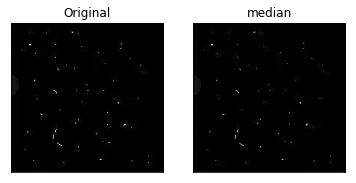

In [5]:
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('image/median.png')
median = cv.medianBlur(img, 3)

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(median), plt.title('median')
plt.xticks([]), plt.yticks([])
plt.show()

#### b. 双边滤波

双边滤波是一种非线性的滤波方法，是结合图像的空间邻近度和像素值相似度的一种折中处理，同时考虑空间与信息和灰度相似性，达到**保边去噪**的目的，具有简单、非迭代、局部处理的特点。

函数： `cv2.bilateralFilter(src=image, d,sigmaColor, sigmaSpace)`

参数说明

- 参数1：输入原图
- 参数2：像素的邻域直径
- 参数3：灰度值相似性高斯函数标准差
- 参数4：空间高斯函数标准差



关于2个sigma参数：
- 简单起见，可以令2个sigma的值相等；
- 如果他们很小（小于10），那么滤波器几乎没有什么效果；
- 如果他们很大（大于150），那么滤波器的效果会很强，使图像显得非常卡通化；

关于参数d：
- 过大的滤波器（d>5）执行效率低。
- 对于实时应用，建议取d=5；
- 对于需要过滤严重噪声的离线应用，可取d=9；
- d>0时，由d指定邻域直径；
- d<=0时，d会自动由sigmaSpace的值确定，且d与sigmaSpace成正比；

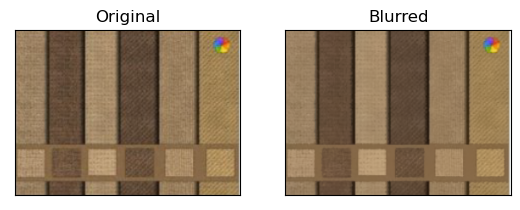

In [10]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('images2/bilateral.png')
img = cv2.cvtColor(img, cv.COLOR_BGR2RGB)
blur = cv2.bilateralFilter(img, -1, 15, 10)
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blur), plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

## 2.4 图像增强

### 2.4.1 图像锐化
图像锐化是图像处理中的一个常用技术，它旨在增强图像的边缘和细节，使其更加清晰。锐化的原理是加强或增强图像的高频部分。以下是关于图像锐化的主要知识点：

拉普拉斯锐化：
- 拉普拉斯锐化基于二阶导数，其目的是检测图像的快速变化区域，即边缘。
- 一个常见的拉普拉斯滤波器是:
$$
{\rm{kernel}} = \frac{1}{16}\left[ {\begin{array}{*{20}{c}}
0&-1&0\\
-1&5&-1\\
0&-1&0
\end{array}} \right]
$$
将此滤波器应用于图像，并将得到的结果添加到原始图像上，从而实现锐化效果。

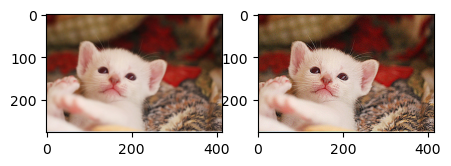

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5, 5))


def custom_blur_demo(image):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32)  #锐化
    dst = cv.filter2D(image, -1, kernel=kernel)
    plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))


src = cv.imread("./images2/sharpen.png")
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
custom_blur_demo(src)

高通滤波锐化：
- 高通滤波可以强调图像的高频部分，例如边缘和噪声。
- 常见的方法是先使用低通滤波器（如均值滤波或高斯滤波）对图像进行平滑，然后从原始图像中减去平滑后的图像，得到高频组件。最后，将高频组件加回到原图上以达到锐化效果。

Unsharp Masking：
- 这是一种常用的图像锐化技术。首先，原始图像被模糊（通常使用高斯滤波），然后模糊的图像从原始图像中减去，得到所谓的"mask"。最后，这个mask被加回到原始图像上。
这种方法的名字可能会引起混淆，因为它是通过增强图像的高频部分来“锐化”图像的。

锐化的副作用：
- 过度锐化可能导致图像上出现不自然的边缘和伪轮廓。
- 锐化也可能增强图像中的噪声。

锐化的应用：
- 锐化通常用于摄影后期处理，帮助增强图像细节。
- 扫描和打印过程中也可能使用锐化，以补偿设备固有的模糊。

- 在进行图像锐化时，通常需要小心调整参数以避免过度锐化，并根据特定的应用和图像内容选择合适的方法。

灰度直方图均衡化

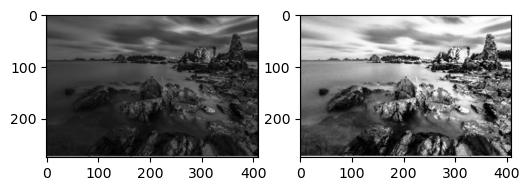

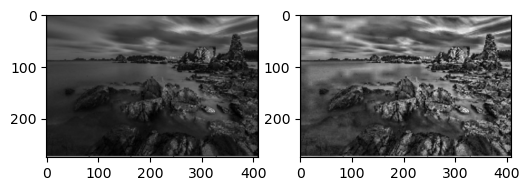

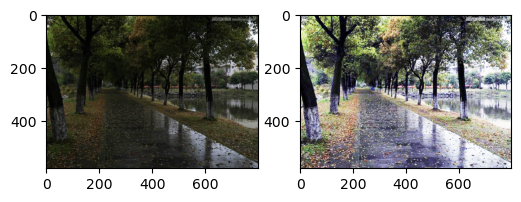

### 2.4.3 Log
对数变换主要用于扩展图像的暗部细节。基本的数学原理很简单，如果有一个像素值为 $r$，其对数变换后的值 $s$ 由以下公式确定：

$$
s=c\log(1+r)
$$

其中，$c$ 是常数，用来调节输出的范围，通常可以基于需要的输出像素范围来选择。
- 将窄范围的低灰度值映射到更宽范围的输出值，高灰度值则相反
- 扩大暗像素的值或抑制图片中的较高灰度值。

解释
- 目的：对数变换将较低的像素值映射到更广泛的输出范围，而将较高的像素值压缩到较小的输出范围。这意味着在图像的暗部（低像素值）会有更多的对比度和细节。
- 对数函数的性质：对数函数在其值较小（接近0）时增长得很快，但随着其值的增加，增长速度会逐渐减慢。这意味着对于暗的像素值，对数变换会有一个较大的增长，但随着像素值的增加，增长率会减小。
- 应用场景：对数变换尤其适用于图像具有过暗和过亮区域的情况。例如，当在一个大范围的亮度下拍摄一张照片时（如背光的情况），对数变换可以帮助增强图像中的暗部细节。
- 1的添加：在公式中，我们向像素值r添加了1，这是为了防止当r=0时对数值变得无穷大。这确保了所有的输入像素值都会有一个有效的输出值。

实际应用中，可能需要对整个图像或特定区域进行对数变换，以达到增强的效果。此外，常数 $c$ 的选择也会影响增强的效果，因此可能需要进行一些实验来确定最佳值。

<img src="assets/log.png" width="800"/>

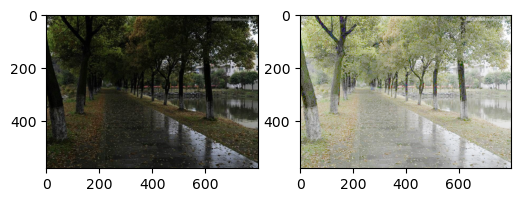

In [1]:
# 彩色直方图均衡化
import cv2
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6, 6))

img = cv2.imread("./images2/dark1.jpg")
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# 将图像数据转换为浮点数以进行计算
(b, g, r) = [np.float32(i) for i in cv2.split(img)]
# 对数变换
b_log = cv2.log(1 + b)
g_log = cv2.log(1 + g)
r_log = cv2.log(1 + r)
# 合并每一个通道
log_image = cv2.merge((r_log, g_log, b_log))
# 缩放到[0, 255]范围内
scaled_log_image = cv2.normalize(log_image, None, 0, 255, cv2.NORM_MINMAX)
scaled_log_image = np.uint8(scaled_log_image)  # 转回8位无符号整数

plt.subplot(1, 2, 2)
plt.imshow(scaled_log_image)
plt.show()

`cv2.normalize` 是 OpenCV 中的一个函数，它用于将数组或图像数据规范化到指定的范围。它可以根据指定的范围和规范化类型来进行线性规范化或其他类型的规范化。

函数的一般形式如下：
```python
cv2.normalize(src, dst, alpha, beta, norm_type, dtype, mask)
```

参数解释：
- **src**：输入数组或图像。
- **dst**：输出数组，通常为`None`，输出结果会返回。
- **alpha**：规范化范围的下界。
- **beta**：规范化范围的上界。
- **norm_type**：规范化类型，如 `cv2.NORM_MINMAX`（线性规范化到 [alpha, beta] 范围）、`cv2.NORM_INF`、`cv2.NORM_L1`、`cv2.NORM_L2` 等。
- **dtype**：输出数组的类型。通常设置为`-1`，表示与输入数组相同。
- **mask**：操作掩码。它指定了哪些元素被考虑进行规范化。通常为`None`，表示处理整个图像。

`cv2.normalize` 可以对 RGB 图片进行操作。当你传入一个彩色图像时，每个通道独立地进行规范化。这意味着红、绿和蓝三个通道分别被规范化，然后组合回一个彩色图像。

这段代码对 RGB 图像的每个通道独立进行规范化。在某些应用中，这可能会导致颜色变化。如果需要保持原始的颜色关系，可能需要将图像转换到其他颜色空间（如HSV），然后只对特定的通道（例如亮度）进行规范化。

### 2.4.4 Gamma变换

Gamma变换是对输入图像灰度值进行的非线性操作，使输出图像灰度值与输入图像灰度值呈指数关系：
$$
V_{\rm out}=AV_{\rm in}^{\gamma}
$$
目的：Gamma变换就是用来图像增强，其提升了暗部细节，通过非线性变换，让图像从暴光强度的线性响应变得更接近人眼感受的响应，即将漂白（相机曝光）或过暗（曝光不足）的图片，进行矫正。

gamma 大于 1，图片会更亮，反之变暗

[  0   0   0   0   1   1   2   2   3   3   4   5   5   6   6   7   8   8
   9   9  10  11  11  12  13  13  14  15  16  16  17  18  19  19  20  21
  22  22  23  24  25  25  26  27  28  29  29  30  31  32  33  34  34  35
  36  37  38  39  40  40  41  42  43  44  45  46  47  47  48  49  50  51
  52  53  54  55  56  57  58  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 113 114 115 116 117 118 119 120 121 122 123
 124 125 127 128 129 130 131 132 133 134 135 136 137 139 140 141 142 143
 144 145 146 147 149 150 151 152 153 154 155 157 158 159 160 161 162 163
 164 166 167 168 169 170 171 173 174 175 176 177 178 180 181 182 183 184
 185 187 188 189 190 191 192 194 195 196 197 198 200 201 202 203 204 206
 207 208 209 210 212 213 214 215 216 218 219 220 221 222 224 225 226 227
 229 230 231 232 233 235 236 237 238 240 241 242 24

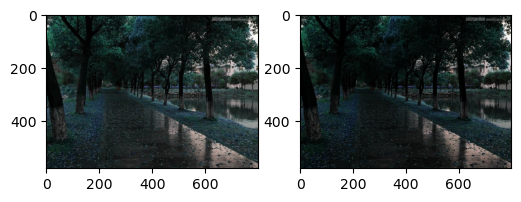

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./images2/dark1.jpg')


def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = []
    for i in range(256):
        table.append(((i / 255.0) ** invGamma) * 255)
    table = np.array(table).astype("uint8")
    return cv2.LUT(image, table)


img_gamma = adjust_gamma(img, 0.8)

plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(img_gamma)
plt.show()

`cv2.LUT()` 是 OpenCV 中的一个函数，用于对输入图像的每个像素值进行查找表（Look-Up Table，LUT）转换。这是一个简单但非常强大的工具，经常用于实现各种图像增强或调整操作。

函数的原型：
```python
dst = cv2.LUT(src, lut)
```

参数解释：
- **src** (`src` 在这里被称为 `image`): 输入图像。
- **lut** (`lut` 在这里被称为 `table`): 查找表，一个数组，其中索引表示输入像素值，索引位置的值表示输出像素值。

返回值：
- **dst**: 转换后的图像。

查找表（LUT）本质上是一个数组，它定义了如何映射输入像素值到输出像素值。例如，如果我们有一个简单的8位图像（像素值在0到255之间），我们的LUT可能也是一个256元素的数组。LUT中索引为0的值是输入像素值0应该被映射到的值，索引为1的值是输入像素值1应该被映射到的值，依此类推。

这个方法的一个常见用途是进行非线性对比度增强。例如，我们可以使用一个S型曲线的LUT来增强图像的对比度。

**示例**:
假设我们想要将所有像素值小于128的像素都映射为0，而大于或等于128的像素值都映射为255（这是一个简化的二值化效果），我们可以使用以下查找表：

```python
import numpy as np
import cv2

# 创建查找表
lut = np.zeros(256, dtype=np.uint8)
lut[128:] = 255

# 读取图像
image = cv2.imread('path_to_image.jpg', cv2.IMREAD_GRAYSCALE)

# 使用 LUT 进行转换
binary_image = cv2.LUT(image, lut)

# 显示结果
cv2.imshow('Original', image)
cv2.imshow('Binary', binary_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

这个简单的LUT转换了输入图像，使其具有更高的对比度。在实际应用中，LUT 可以更加复杂，并用于实现各种图像处理效果。


<img src="assets/gamma_correct.png" width="800"/>

横坐标是输入灰度值，纵坐标是输出灰度值，蓝色曲线是gamma值小于1时的输入输出关系，红色曲线是gamma值大于1时的输入输出关系。可以观察到，当gamma值小于1时(蓝色曲线)，图像的整体亮度值得到提升，同时低灰度处的对比度得到增加，更利于分辩低灰度值时的图像细节。

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


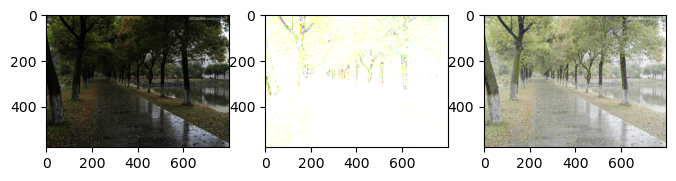

In [9]:
# 彩色直方图均衡化
import cv2
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 8))

img = cv2.imread("./images2/dark1.jpg")
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# 将图像数据转换为浮点数以进行计算
(b, g, r) = [np.float32(i) for i in cv2.split(img)]
# 对数变换
b_log = cv2.log(1 + b)
g_log = cv2.log(1 + g)
r_log = cv2.log(1 + r)
# 合并每一个通道
log_image = cv2.merge((r_log, g_log, b_log))
plt.subplot(1, 3, 2)
plt.imshow(log_image)
# 缩放到[0, 255]范围内
scaled_log_image = cv2.normalize(log_image, None, 0, 255, cv2.NORM_MINMAX)
scaled_log_image = np.uint8(scaled_log_image)  # 转回8位无符号整数
plt.subplot(1, 3, 3)
plt.imshow(scaled_log_image)
plt.show()

这个警告信息是由matplotlib库的`imshow()`函数产生的，当你试图显示RGB图像数据时。它表示你的图像数据超出了`imshow()`函数对于RGB数据的有效范围。具体来说，对于RGB图像数据：

- 如果数据类型是浮点数（例如 `float32` 或 `float64`），像素值必须在 [0, 1] 的范围内。
- 如果数据类型是整数（例如 `uint8`），像素值必须在 [0, 255] 的范围内。

超出这些范围的值将被“裁剪”或“限制”在有效范围内，这可能会导致显示的图像颜色失真。

**如何解决**：

1. **确保数据类型和值的范围匹配**:
   - 如果你的图像数据是浮点数，确保其值在 [0, 1] 范围内。
   - 如果你的图像数据是整数，确保其值在 [0, 255] 范围内。

2. **转换数据类型**:
   如果你有一个浮点数类型的图像，其值范围是 [0, 255]，你可以将其转换为 [0, 1] 范围：
   ```python
   image = image / 255.0
   ```

3. **使用clip函数**:
   你可以使用NumPy的`clip()`函数确保所有的像素值都在有效范围内：
   ```python
   import numpy as np
   image = np.clip(image, 0, 255)
   ```

之后，使用`imshow()`函数显示图像时就不会再收到此警告信息。


### 2.4.6 灰度反转

黑色图片中有大量明亮细节，做灰度反转，有利于观察

---

## 2.5 形态学操作

### 2.5.1 图像形态学概要

形态学，是图像处理中应用最为广泛的技术之一，主要用于从图像中提取对表达和描绘区域形状有意义的图像分量，使后续的识别工作能够抓住目标对象最为本质的形状特征，如边界和连通区域等。

结构元素

- 设有两幅图像 B，X
- 若 X（大的图像）是被处理的对象，而 B（小的图像） 是用来处理 X 的，则称 B 为结构元素(structure element)，又被形象地称做刷子。
- 结构元素通常都是一些比较小的图像。

腐蚀和膨胀

- 图像的膨胀（Dilation）和腐蚀（Erosion）是两种基本的形态学运算，其中
- 膨胀类似于“领域扩张”，将图像中的白色部分进行扩张，其运行结果图比原图的白色区域更大；
- 腐蚀类似于“领域被蚕食”，将图像中白色部分进行缩减细化，其运行结果图比原图的白色区域更小。



### 2.5.2 图像腐蚀

针对灰度图像

腐蚀的运算符是 “－”，其定义如下：
$$
A-B=\{x|B_x\subseteq A\}
$$
该公式表示图像 A 用卷积模板 B 来进行腐蚀处理，通过模板 B 与图像 A 进行卷积计算，得出 B 覆盖区域的像素点最小值，并用这个最小值来替代参考点的像素值。

![](assets/erosion1.png)

把结构元素 B 平移 a 后得到 Ba，若 Ba 包含于X，我们记下这个 a 点，所有满足上述条件的 a 点组成的集合称做 X 被 B 腐蚀(Erosion)的结果。如下图所示。

![](assets/erosion2.png)
其中 X 是被处理的对象， B 是结构元素。对于任意一个在阴影部分的点 a， Ba 包含于 X，所以 X 被 B 腐蚀的结果就是那个阴影部分。阴影部分在 X 的范围之内，且比 X 小，就象 X 被剥掉了一层似的。

![](assets/erosion3.png)

腐蚀的方法是，拿 B 的中心点和 X 上的点一个一个地对比，如果 B 上的所有点都在 X 的范围内，则该点保留，否则将该点去掉；右边是腐蚀后的结果。可以看出，它仍在原来 X 的范围内，且比X 包含的点要少，就象 X 被腐蚀掉了一层。

函数： `cv2.erode(src,kernel,anchor,iterations)`

- 参数1： `src`，输入的图像。应该是一个二进制图像（通常是黑白图像）。
- 参数2： `kernel`，用于侵蚀操作的结构元素。结构元素决定了侵蚀的方式。如果不指定，默认是一个 3x3 的矩形。结构元素可以使用 `cv2.getStructuringElement` 函数来创建。
- 参数3： `anchor`，结构元素的锚点位置。默认值是 (-1, -1)，表示结构元素的中心点。如果你有特定的需求，可以指定其他位置。
- 参数4： `iterations`，侵蚀操作的次数。默认值是 1，但可以通过指定更大的数字来多次侵蚀图像。


腐蚀后的图像

![](assets/erosion4.png)

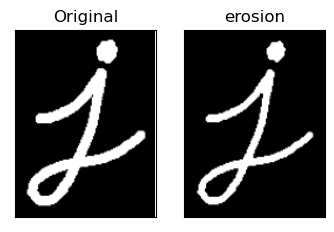

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
img = cv2.imread('./images2/morphology.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
kernel = np.ones((3, 3), np.uint8)
erosion = cv2.erode(img, kernel, iterations=1)
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(erosion), plt.title('erosion')
plt.xticks([]), plt.yticks([])
plt.show()

In [2]:
#kernel = np.ones((5,5),np.uint8)
#kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7))
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
#kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
print(kernel)

[[0 0 0 1 0 0 0]
 [0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [0 1 1 1 1 1 0]
 [0 0 0 1 0 0 0]]


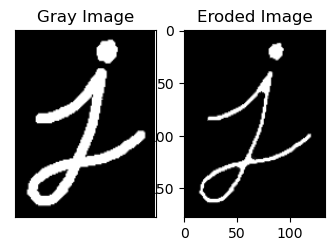

In [1]:
import cv2
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))

image = cv2.imread("./images2/morphology.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.subplot(121), plt.imshow(gray, cmap='gray'), plt.title('Gray Image')
plt.xticks([]), plt.yticks([])

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
eroded = cv2.erode(gray.copy(), kernel, 10)

plt.subplot(122), plt.imshow(eroded, cmap='gray'), plt.title('Eroded Image')
plt.show()

**选讲**

`cv2.erode()` 中其他参数
- `borderType`: 用于扩展图像边缘的像素复制方法。这对于处理图像边缘上的像素很有用。
- `borderValue`: 当 `borderType` 为 `BORDER_CONSTANT` 时，该值用作边界的像素值。


在形态学操作（如侵蚀、膨胀等）中，处理图像边缘是一个挑战，因为结构元素可能超出图像的边界。为了解决这个问题，OpenCV 提供了边界类型 `borderType` 和边界值 `borderValue` 这两个参数。

1. **borderType**: 这是一个标志，用于确定如何处理图像边缘。主要的标志有：

   - `cv2.BORDER_CONSTANT`: 添加一个固定值的颜色边框。要使用这个标志，你还需要定义一个 `borderValue`。
   - `cv2.BORDER_REFLECT`: 边框将是图像本身的镜像。例如: fedcba|abcdefgh|hgfedcb
   - `cv2.BORDER_REFLECT_101` 或 `cv2.BORDER_DEFAULT`: 类似于上述反射，但略有不同。例如: gfedcb|abcdefgh|gfedcba
   - `cv2.BORDER_REPLICATE`: 最后一个元素复制。例如: aaaaaa|abcdefgh|hhhhhhh
   - 还有其他选项，但上述几个是最常用的。

2. **borderValue**: 当 `borderType` 设置为 `cv2.BORDER_CONSTANT` 时使用。它定义了添加的颜色边框的值。


### 2.5.3 图像膨胀

膨胀(dilation)可以看做是腐蚀的对偶运算，其定义是：把结构元素 B 平移 a 后得到 Ba，若 Ba 击中 X，我们记下这个 a 点。所有满足上述条件的 a 点组成的集合称做 X 被 B 膨胀的结果。如下图所示。

![](assets/dilation1.png)

其中 X 是被处理的对象， B 是结构元素，对于任意一个在阴影部分的点 a， Ba 击中 X，所以 X 被 B 膨胀的结果就是那个阴影部分。阴影部分包括 X 的所有范围，就像 X 膨胀了一圈似的。

---

需要说明：若是灰度图像处理时，是寻找结构元素中覆盖目标图像的最大值，赋给结构元素原点位置。（而图中所展示的是最简单的二值图情况下变化）

<img src="assets/dilation2.png" width="800"/>

膨胀时：只要结构元素与目标区域有交集，就保留结构元素的<u>中心点覆盖位置</u>

膨胀后的图像

![](assets/dilation3.png)


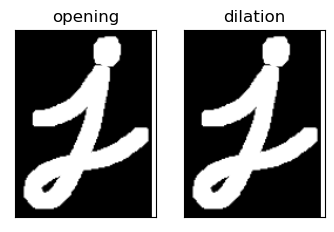

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
img = cv2.imread('./images2/morphology.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#kernel = np.ones((3,),np.uint8)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))

dilation = cv2.dilate(img, kernel, iterations=1)
kernel1 = np.ones((7, 7), np.uint8)
opening = cv2.morphologyEx(dilation, cv2.MORPH_OPEN, kernel1)
plt.subplot(121), plt.imshow(opening), plt.title('opening')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(dilation), plt.title('dilation')
plt.xticks([]), plt.yticks([])
plt.show()

### 2.5.4 开运算

开运算 = 先腐蚀运算，再膨胀运算（看上去把细微连在一起的两块目标分开了），它对于消除噪音很有用，开运算的效果图如下图所示：

![](assets/open.png)

开运算总结：

1. 开运算能够除去孤立的小点，毛刺和小桥，而总的位置和形状不变。
2. 开运算是一个基于几何运算的滤波器。
3. 结构元素大小的不同将导致滤波效果的不同。
4. 不同的结构元素的选择导致了不同的分割，即提取出不同的特征。

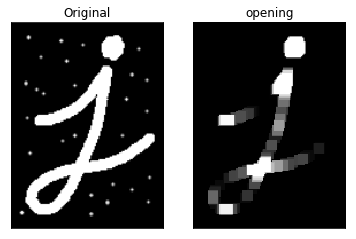

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./images2/open.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#kernel = np.ones((5,5),np.uint8)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(opening), plt.title('opening')
plt.xticks([]), plt.yticks([])
plt.show()

### 2.5.5 闭运算

闭运算 = 先膨胀运算，再腐蚀运算（看上去将两个细微连接的图块封闭在一起），在关闭前景对象内部的小孔或对象上的小黑点时很有用。

闭运算的效果图如图所示：

![](assets/close.png)

闭运算总结：

1. 闭运算能够填平小湖（即小孔），弥合小裂缝，而总的位置和形状不变。
2. 闭运算是通过填充图像的凹角来滤波图像的。
3. 结构元素大小的不同将导致滤波效果的不同。
4. 不同结构元素的选择导致了不同的分割。

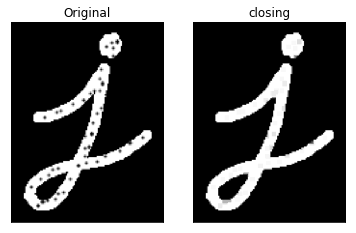

In [15]:
import cv2 as cv
import numpy as np

img = cv.imread('./images2/close.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
#kernel = np.ones((5,5),np.uint8)
kernel = np.ones((7, 7), np.uint8)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(closing), plt.title('closing')
plt.xticks([]), plt.yticks([])
plt.show()

### 2.5.6 形态学梯度

形态学梯度（Gradient）：

- 基础梯度：基础梯度是用膨胀后的图像减去腐蚀后的图像得到差值图像，也是OpenCV中支持的计算形态学梯度的方法，而此方法得到梯度有称为基本梯度。
- 内部梯度：是用原图像减去腐蚀之后的图像得到差值图像，称为图像的内部梯度。
- 外部梯度：图像膨胀之后再减去原来的图像得到的差值图像，称为图像的外部梯度。


这是图像膨胀和腐蚀之间的区别。结果将看起来像对象的轮廓。

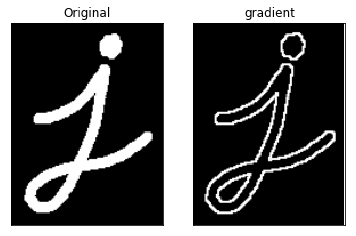

In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('./images2/morphology.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
kernel = np.ones((3, 3), np.uint8)
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(gradient), plt.title('gradient')
plt.xticks([]), plt.yticks([])
plt.show()

### 2.5.7 顶帽和黑帽
- 顶帽（Top Hat）：原图像与开运算图的差值，突出原图像中比周围亮的区域
- 黑帽（Black Hat）：闭运算图像与原图像的差值，突出原图像中比周围暗的区域

顶帽：它是原图像和开运算之后图像之差。下面的示例针对9x9内核完成。

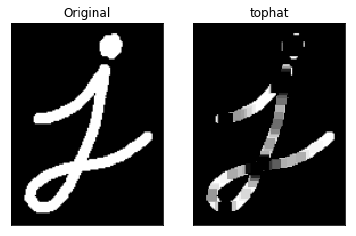

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('./images2/morphology.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
kernel = np.ones((9, 9), np.uint8)
tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(tophat), plt.title('tophat')
plt.xticks([]), plt.yticks([])
plt.show()

黑帽：这是输入图像和图像闭运算之差。

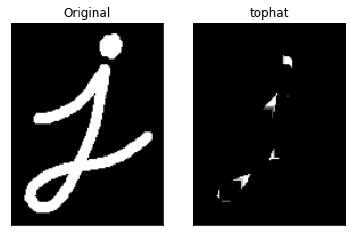

In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('./images2/morphology.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
kernel = np.ones((9, 9), np.uint8)
tophat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(tophat), plt.title('tophat')
plt.xticks([]), plt.yticks([])
plt.show()

### 2.5.8 结构元素（选讲）

In [19]:
# 矩形内核
cv.getStructuringElement(cv.MORPH_RECT, (5, 5))
a = [[1, 1, 1, 1, 1],
     [1, 1, 1, 1, 1],
     [1, 1, 1, 1, 1],
     [1, 1, 1, 1, 1],
     [1, 1, 1, 1, 1]]
print(a)

[[1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1]]


In [20]:
# 椭圆内核
cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

这段代码是使用 OpenCV（一个广泛使用的计算机视觉库）来生成一个结构化元素。在这里，你问的是关于形态学操作中的结构元素或内核的意义。让我们详细解释一下。

1. **形态学操作 (Morphological Operations)**:
形态学操作是基于图像形状进行的简单操作，常在二进制图像上使用。这些操作需要两个输入，一个是原始图像，另一个是称为结构化元素或内核的决定操作性质的形状。

2. **结构化元素 (Structuring Element)**:
结构化元素是一个用于定义形态学操作性质的小矩阵。例如，形态学操作可以是扩张或腐蚀。扩张会"增大"图像中的白色区域（或前景），而腐蚀会"减少"它。

3. **代码解释**:
```python
cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
```
- `cv.MORPH_ELLIPSE`: 这表示你想要一个椭圆形（或圆形，因为5x5的情况下它是一个圆）的结构化元素。
- `(5, 5)`: 这是结构化元素的大小。在这里，它是一个5x5的矩阵，对于`MORPH_ELLIPSE`，它将给出一个填充的圆形。

生成的结构化元素看起来大约是这样的：

```
0 0 1 0 0
0 1 1 1 0
1 1 1 1 1
0 1 1 1 0
0 0 1 0 0
```

其中"1"表示椭圆的像素，"0"表示背景。

这个结构化元素可以用于形态学操作，如腐蚀或扩张。例如，使用这个5x5的圆形结构化元素进行腐蚀操作，会删除小于该圆形大小的所有白色区域。